In [206]:
import pandas as pd
import numpy as np
from scipy import stats

In [207]:
ds1 = pd.read_csv("Covid19_Vaccines_Cleaned.csv")
ds1.shape

(9144, 37)

In [208]:
ds1['VAX_TYPE'].value_counts()

COVID19    9119
FLU4         21
FLUR4         4
Name: VAX_TYPE, dtype: int64

In [209]:
ds1 = ds1[ds1.VAX_TYPE != "FLU4"]
ds1 = ds1[ds1.VAX_TYPE != "FLUR4"]
ds1.shape

(9119, 37)

In [210]:
ds1['NUMDAYS'].value_counts()

0.0        3139
1.0        1909
2.0         597
3.0         358
4.0         326
7.0         296
8.0         269
5.0         238
6.0         212
9.0         161
10.0        115
11.0         80
12.0         75
13.0         69
14.0         61
15.0         37
17.0         31
19.0         29
16.0         28
20.0         25
18.0         22
28.0         16
21.0         16
27.0         15
31.0         13
25.0         12
22.0         12
35.0          9
26.0          9
30.0          9
           ... 
37.0          4
33.0          4
34.0          3
42.0          2
36.0          2
38.0          2
61.0          1
12504.0       1
47.0          1
39.0          1
22386.0       1
361.0         1
18753.0       1
367.0         1
44.0          1
10399.0       1
13971.0       1
40.0          1
368.0         1
36896.0       1
363.0         1
335.0         1
7312.0        1
60.0          1
50.0          1
372.0         1
371.0         1
369.0         1
364.0         1
13562.0       1
Name: NUMDAYS, Length: 6

In [211]:
ds1.drop('VAX_TYPE', axis=1, inplace=True)
ds1.drop('ER_VISIT', axis=1, inplace=True)
ds1.drop('VAX_DATE', axis=1, inplace=True)
ds1.drop('LAB_DATA', axis=1, inplace=True)
ds1.drop('OFC_VISIT', axis=1, inplace=True)
ds1.drop('ER_ED_VISIT', axis=1, inplace=True)
ds1.drop('PRIOR_VAX', axis=1, inplace=True)
ds1.drop('Unnamed: 0', axis=1, inplace=True)
ds1.drop('CUR_ILL', axis=1, inplace=True)
ds1.drop('VAX_ROUTE', axis=1, inplace=True)

In [212]:
pd.set_option("display.max_columns",None)

In [213]:
pd.set_option("display.min_rows",200)

In [214]:
ds1['HISTORY'].replace({"None":"none","Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None":"none",
                       "No":"none","no":"none","Unknown":"unknown",
                       "Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: none":"none",
                       "NONE":"none", "N/a":"none", "UNKNOWN":"unknown","None reported":"none",
                       "Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: No":"none",
                       "Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None, Comment: Patient History: No":"none",
                       "none reported":"none", "none listed":"none", "None Known":"none",
                       "Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: NONE":"none",
                       "Not known":"none","None.":"none","UNK":"unknown","UKN":"unknown", "Na":"none",
                       "none known":"none", "unsure":"unknown","No.":"none","Medical History/Concurrent Conditions: No adverse event (No reported medical history)":"none",
                       "Medical History/Concurrent Conditions: No adverse event (No reported medical history.)":"none",
                       "Medical History/Concurrent Conditions: No adverse event (No medical history reported)":"none",
                       "None known":"none","na":"none","See above":"unknown","as above":"unknown","As above":"unknown","see above":"unknown"}, inplace = True)

In [215]:
ds1['HISTORY'].replace({"none":np.nan}, inplace = True)
ds1['HISTORY'].replace({"unknown":np.nan}, inplace = True)

In [216]:
ds1['OTHER_MEDS'].replace({"none":np.nan, "None":np.nan,"Unknown":np.nan,"unknown":np.nan,
                          "No":np.nan,"no":np.nan,"NONE":np.nan,"UNKNOWN":np.nan, "UNK":np.nan,
                          "UKN":np.nan, "None reported":np.nan, "N/a":np.nan, "NO":np.nan,
                          "None.":np.nan,";":np.nan, ";  ;":np.nan,";  ;  ;":np.nan,"None Known":np.nan,
                          "none reported":np.nan, "Na":np.nan, "none known":np.nan, "Not known":np.nan,
                          "None listed":np.nan, "Unkown":np.nan }, inplace = True)

In [217]:
ds1['ALLERGIES'].replace({"none":np.nan, "None":np.nan,"Unknown":np.nan,"unknown":np.nan,
                          "No":np.nan,"no":np.nan,"NONE":np.nan,"UNKNOWN":np.nan, "UNK":np.nan,
                          "UKN":np.nan, "None reported":np.nan, "N/a":np.nan, "NO":np.nan,
                          "None.":np.nan,";":np.nan, ";  ;":np.nan,";  ;  ;":np.nan,"None Known":np.nan,
                          "none reported":np.nan, "Na":np.nan, "none known":np.nan, "Not known":np.nan,
                          "None listed":np.nan, "Unkown":np.nan, "NKA":np.nan,"NKDA":np.nan,
                         "No known allergies":np.nan,"None known":np.nan,
                         "no known allergies":np.nan, "No Known Allergies":np.nan, "nka":np.nan, 
                         "nkda":np.nan, "No allergies":np.nan, "Nkda":np.nan, "No known allergies":np.nan,
                         "Nka":np.nan, "No known drug allergies":np.nan, "KNA":np.nan,
                         "No known Allergies":np.nan,"None known.":np.nan,"No known":np.nan,
                         "No Known":np.nan, "No know allergies":np.nan,"no allergies":np.nan,
                         "none listed":np.nan, "KNDA":np.nan,"None noted":np.nan,
                         "None Reported":np.nan, "No known allergies":np.nan,
                         "No Known Drug Allergies":np.nan, "NKDA, NKFA": np.nan,
                         "NO KNOWN ALLERGIES":np.nan}, inplace = True)

In [218]:
lista = []
for i in ds1['HISTORY']:
    if i is not np.nan:
        lista.append(1)
    else:
        lista.append(0)


In [219]:
lista2 = []
for i in ds1['OTHER_MEDS']:
    if i is not np.nan:
        lista2.append(1)
    else:
        lista2.append(0)
        


In [220]:
lista3 = []
for i in ds1['ALLERGIES']:
    if i is not np.nan:
        lista3.append(1)
    else:
        lista3.append(0)

In [221]:
ds1['Days_bf_Dead'] = ds1.Days_bf_Dead.astype(float)
ds1['Days_bf_Dead']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
9114     NaN
9115    15.0
9116    15.0
9117     NaN
9118     NaN
9119     NaN
9120     NaN
9121     NaN
9122     NaN
9123     NaN
9124     NaN
9125     2.0
9126     NaN
9127    18.0
9128    16.0
9129     5.0
9130     8.0
9131     9.0
9132     4.0
9133     1.0
9134     2.0
9135     5.0
9136     2.0
9137    25.0
9138     8.0
9139    12.0
9140     1.0
9141     1.0
9142     NaN
9143     4.0
Name: Days_bf_Dead, Length: 9119, dtype: float64

In [222]:
lista4 = []
for i in ds1['Days_bf_Dead']:
    if i <= 0 :
        lista4.append(0)
    else:
        lista4.append(i)

In [223]:
lista4 = pd.DataFrame(lista4, columns =['Days_Bf_Dead'])
lista4

,Days_Bf_Dead
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [224]:
ds1['OTHER_MEDS'].isnull().sum()

4438

In [225]:
lista = pd.DataFrame(lista, columns =['HISTORY1'])
lista2 = pd.DataFrame(lista2, columns =['OTHER_MEDS1'])
lista3 = pd.DataFrame(lista3, columns =['ALLERGIES'])

In [226]:
ds1['HISTORY1'] = lista
ds1['OTHER_MEDS1'] = lista2
ds1['ALLERGIES1'] = lista3
ds1['Days_Bf_Dead'] = lista4

In [227]:
ds1.drop('SYMPTOM1', axis=1, inplace=True)
ds1.drop('SYMPTOM2', axis=1, inplace=True)
ds1.drop('SYMPTOM3', axis=1, inplace=True)
ds1.drop('SYMPTOM4', axis=1, inplace=True)
ds1.drop('SYMPTOM5', axis=1, inplace=True)
ds1.drop('VAX_LOT', axis=1, inplace=True)
ds1.drop('STATE', axis = 1, inplace = True)
ds1.drop('HISTORY', axis = 1, inplace = True)
ds1.drop('OTHER_MEDS', axis = 1, inplace = True)
ds1.drop('ALLERGIES', axis = 1, inplace = True)
ds1.drop('Days_bf_Dead', axis = 1, inplace = True)

In [228]:
ds1['VAX_DOSE_SERIES'].replace({"7+":7}, inplace = True)

In [229]:
ds1['RECOVD'] = ds1['RECOVD'].replace("U", 2)
ds1['SEX'].replace({"U":np.nan}, inplace = True)

In [230]:
ds1.drop('NUMDAYS', axis=1, inplace=True)

In [231]:
ds1["BIRTH_DEFECT"].fillna("0", inplace= True)
ds1["Days_Bf_Dead"].fillna("0", inplace= True)
ds1["VAX_DOSE_SERIES"].fillna("0", inplace= True)
#ds1["NUMDAYS"].fillna("0", inplace= True)
ds1["HISTORY1"].fillna("0", inplace= True)
ds1["OTHER_MEDS1"].fillna("0", inplace= True)
ds1["ALLERGIES1"].fillna("0", inplace= True)

In [232]:
ds1.drop('BIRTH_DEFECT', axis = 1, inplace = True)

In [233]:
#replace_map = {'V_ADMINBY': {'UNK': 0, 'PVT': 1, 'OTH': 2, 'SEN': 3, 'WRK': 4, 'PUB': 5, 'PHM': 6, 'MIL': 7,
 #                           'SCH': 8}}
#ds1['VAX_MANU'].replace({"PFIZER\BIONTECH": 0, "MODERNA":1}, inplace = True)

#replace_map2 = {'VAX_ROUTE': {'IM': 1, 'SYR': 2, 'OT': 3, 'SC': 4, 'UN': 5, 'ID': 6, 'JET': 7,}}

In [234]:
#ds1.replace(replace_map, inplace=True)
#ds1.replace(replace_map2, inplace=True)


In [235]:
#ds1['VAX_ROUTE'].value_counts()

In [236]:
ds1 = ds1.dropna(axis=0)

In [237]:
ds1['HOSPDAYS'].value_counts()

0.0     6618
1.0      399
2.0      359
3.0      220
4.0      139
5.0      103
6.0       63
7.0       40
8.0       23
10.0      14
9.0       13
13.0      10
14.0       8
11.0       8
16.0       7
21.0       5
12.0       5
26.0       3
15.0       3
20.0       2
19.0       2
27.0       1
25.0       1
24.0       1
36.0       1
18.0       1
17.0       1
22.0       1
Name: HOSPDAYS, dtype: int64

In [238]:
ds1.isnull().sum()

VAERS_ID           0
AGE_YRS            0
SEX                0
DIED               0
L_THREAT           0
HOSPITAL           0
HOSPDAYS           0
X_STAY             0
DISABLE            0
RECOVD             0
V_ADMINBY          0
VAX_MANU           0
VAX_DOSE_SERIES    0
total              0
HISTORY1           0
OTHER_MEDS1        0
ALLERGIES1         0
Days_Bf_Dead       0
dtype: int64

In [239]:
ds1.dtypes

VAERS_ID             int64
AGE_YRS            float64
SEX                 object
DIED                 int64
L_THREAT             int64
HOSPITAL             int64
HOSPDAYS           float64
X_STAY               int64
DISABLE              int64
RECOVD              object
V_ADMINBY           object
VAX_MANU            object
VAX_DOSE_SERIES     object
total                int64
HISTORY1            object
OTHER_MEDS1         object
ALLERGIES1          object
Days_Bf_Dead        object
dtype: object

In [240]:
Vacc = pd.get_dummies(ds1['VAX_MANU'], drop_first=True)

In [241]:
#vaxr = pd.get_dummies(ds1['VAX_ROUTE'], drop_first=True)
#ss = pd.get_dummies(ds1['V_ADMINBY'], drop_first=True)

In [242]:
ds1.drop('VAX_MANU', axis=1, inplace=True)
ds1.drop('V_ADMINBY', axis=1, inplace=True)

In [243]:
ds1 = ds1.join(Vacc)
#ds1 = ds1.join(ss)

In [244]:
dsnsk = ds1

In [246]:
pd.DataFrame(dsnsk).to_csv("C:/Users/juanp/Desktop/MIP/Machine Learning/Orsenigo/dsnk.csv")

In [247]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ds1[["Days_Bf_Dead", "AGE_YRS","total","HOSPDAYS", "RECOVD", "VAX_DOSE_SERIES"]] = scaler.fit_transform(ds1[["Days_Bf_Dead","AGE_YRS","total","HOSPDAYS", "RECOVD", "VAX_DOSE_SERIES"]])
ds1.head()

,VAERS_ID,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DOSE_SERIES,total,HISTORY1,OTHER_MEDS1,ALLERGIES1,Days_Bf_Dead,PFIZER\BIONTECH
0,916600,0.312649,0,0,0,0,0.0,0,0,0.5,0.142857,0.01,0,0,1,0.0,0
1,916601,0.694511,0,0,0,0,0.0,0,0,0.5,0.142857,0.01,1,1,1,0.0,0
2,916602,0.217184,0,0,0,0,0.0,0,0,1.0,0.142857,0.03,0,0,1,0.0,1
3,916603,0.551313,0,0,0,0,0.0,0,0,0.5,0.000000,0.02,1,0,1,0.0,0
4,916604,0.446301,0,0,0,0,0.0,0,0,0.0,0.142857,0.03,0,0,0,0.0,0


In [248]:
dsnsk.drop('BIRTH_DEFECT', axis=1, inplace=True)
dsnsk.drop('X_STAY', axis=1, inplace=True)
dsnsk.drop('Days_Bf_Dead', axis=1, inplace=True)

KeyError: "['BIRTH_DEFECT'] not found in axis"

In [249]:
ds1

,VAERS_ID,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DOSE_SERIES,total,HISTORY1,OTHER_MEDS1,ALLERGIES1,Days_Bf_Dead,PFIZER\BIONTECH
0,916600,0.312649,0,0,0,0,0.000000,0,0,0.5,0.142857,0.01,0,0,1,0.000000,0
1,916601,0.694511,0,0,0,0,0.000000,0,0,0.5,0.142857,0.01,1,1,1,0.000000,0
2,916602,0.217184,0,0,0,0,0.000000,0,0,1.0,0.142857,0.03,0,0,1,0.000000,1
3,916603,0.551313,0,0,0,0,0.000000,0,0,0.5,0.000000,0.02,1,0,1,0.000000,0
4,916604,0.446301,0,0,0,0,0.000000,0,0,0.0,0.142857,0.03,0,0,0,0.000000,0
5,916606,0.417661,0,0,0,0,0.000000,0,0,0.5,0.142857,0.00,0,0,1,0.000000,0
6,916607,0.474940,1,0,0,0,0.000000,0,0,0.5,0.000000,0.02,1,1,1,0.000000,0
7,916608,0.312649,1,0,0,0,0.000000,0,0,0.0,0.142857,0.01,0,0,0,0.000000,0
8,916609,0.675418,0,0,0,0,0.000000,0,0,0.0,0.142857,0.02,1,1,1,0.000000,0
9,916610,0.169451,0,0,0,0,0.000000,0,0,0.0,0.142857,0.01,0,0,1,0.000000,0


In [250]:
pd.DataFrame(ds1).to_csv("C:/Users/juanp/Desktop/MIP/Machine Learning/Orsenigo/Covid19_Vaccines_Cleaned_Final.csv")

NameError: name 'dsnk' is not defined

# Clustering

In [252]:
df = pd.read_csv("Covid19_Vaccines_Cleaned_Final.csv")

In [253]:
import matplotlib.pyplot as plt

In [254]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('BIRTH_DEFECT', axis=1, inplace=True)
df.drop('X_STAY', axis=1, inplace=True)
df.drop('Days_Bf_Dead', axis=1, inplace=True)

KeyError: "['BIRTH_DEFECT'] not found in axis"

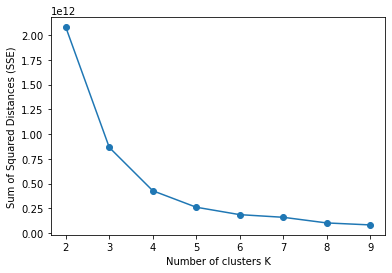

In [255]:
from sklearn.cluster import KMeans

# Select the number of clusters by means of SSE
SSE = []
range_n_clusters = range(2,10)
for nclust in range_n_clusters:
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust, 
                init='random', # or 'k-means++'
                n_init=10, 
                max_iter=300, 
                random_state=0)
    # Generate K-means clustering
    km.fit(df)
    SSE.append(km.inertia_)
    
plt.plot(range_n_clusters, SSE, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

N° of clusters = 2 -> Average silhouette coefficient:  0.7434186644778409
N° of clusters = 3 -> Average silhouette coefficient:  0.7052828751571248
N° of clusters = 4 -> Average silhouette coefficient:  0.7076144699054928
N° of clusters = 5 -> Average silhouette coefficient:  0.7062278526671212
N° of clusters = 6 -> Average silhouette coefficient:  0.6920890344633102
N° of clusters = 7 -> Average silhouette coefficient:  0.6780449514165664
N° of clusters = 8 -> Average silhouette coefficient:  0.6867004718808452


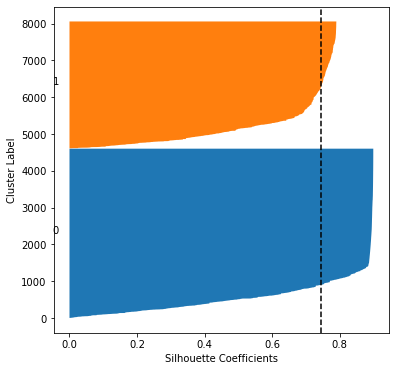

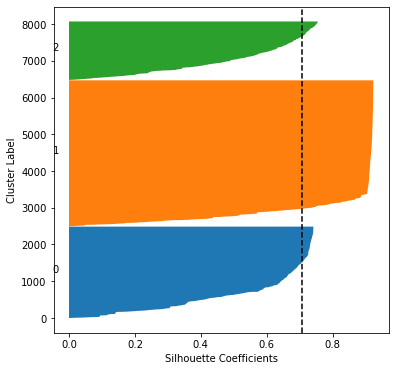

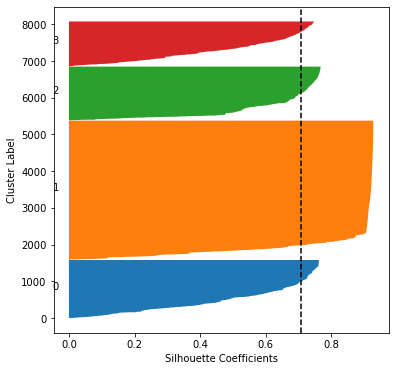

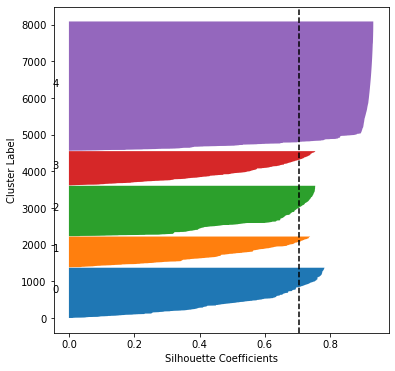

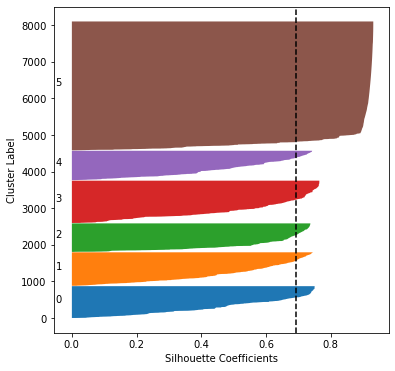

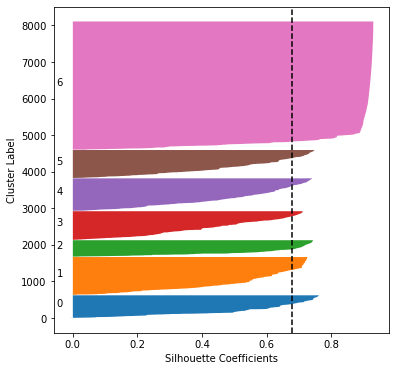

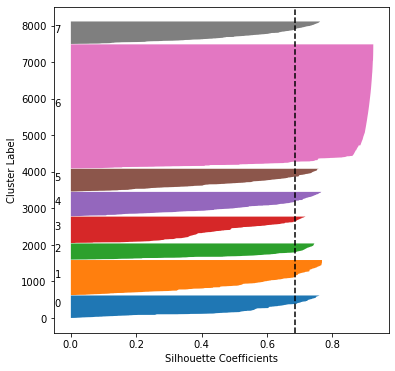

In [256]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Select the number of clusters by means of the silohuette coefficient
range_n_clusters = range(2,9)
for nclust in range_n_clusters:
    
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust,
                init='random',
                n_init=10, 
                max_iter=100,
                random_state=0)
    
    # Generate K-means clustering, compute cluster centers and predict the cluster label for each example
    cluster_labels = km.fit_predict(df)
    cluster_labels_set = np.unique(cluster_labels)
    
    # Compute the average silhouette coefficient
    silhouette_avg_coeff = silhouette_score(df, cluster_labels)
    print("N° of clusters =", nclust, "-> Average silhouette coefficient: ", silhouette_avg_coeff)
    
    # Compute the silhouette coefficient for each example
    silhouette_example_coeff = silhouette_samples(df, cluster_labels)
    
    # For the examples belonging to each cluster plot the silhouette coefficient
    fig = plt.figure(nclust) 
    fig.set_size_inches(6,6)
    ax1 = fig.add_subplot()
    
    y_lower = 0
    for i in cluster_labels_set:
        # Aggregate and sort the silhouette coefficients for the examples belonging to the cluster
        cluster_i_silhouette_coeff = silhouette_example_coeff[cluster_labels==i]
        cluster_i_silhouette_coeff.sort()
        y_upper = y_lower + cluster_i_silhouette_coeff.shape[0]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_coeff)
        ax1.text(-0.05, y_lower + 0.5 * cluster_i_silhouette_coeff.shape[0], str(i))
        y_lower = y_upper + 10
    
    # Enrich the silhouette plot
    ax1.axvline(x=silhouette_avg_coeff, color="black", linestyle="--")
    ax1.set_xlabel("Silhouette Coefficients")
    ax1.set_ylabel("Cluster Label")

In [257]:
km = KMeans(n_clusters=4,
            init='random',
            n_init=10, 
            max_iter=100,
            random_state=0)
cluster_labels = km.fit_predict(df)
#df['Cluster_Label'] = cluster_labels
#df

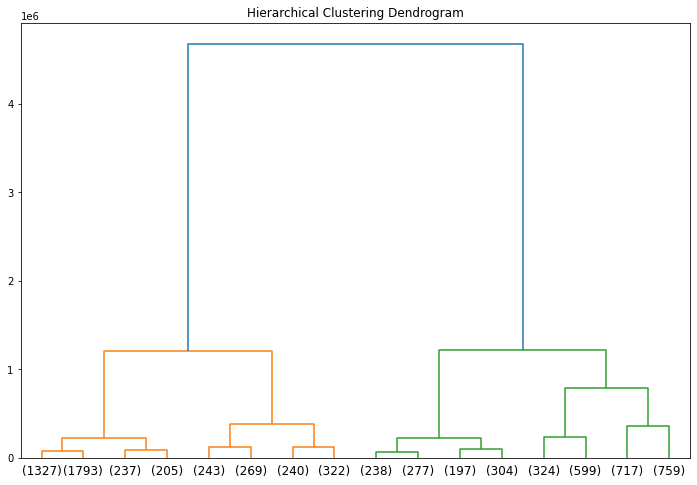

In [258]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(df, metric='euclidean', method='ward')

plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the top X levels of the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()

In [287]:
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
kmeans = KMeans(
        n_clusters=4, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans = km
kmeans.fit(df)
clusters=pd.DataFrame(df,columns=df.drop("VAERS_ID",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4

In [260]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green','yellow'])

In [274]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [275]:


ff = pd.read_csv("dsnk.csv")
ff['Cluster_Label'] = kmeans.labels_

In [268]:
ff.drop('Unnamed: 0', axis=1, inplace=True)

In [276]:
ff['Cluster_Label'].value_counts()

1    3787
0    1581
2    1463
3    1220
Name: Cluster_Label, dtype: int64

In [262]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [281]:
def plot_hist(ff, col, xtitle, ytitle, title):
    fig = go.Figure(data=[go.Histogram(x=ff[col])])
    fig.update_layout(title=title)
    fig.update_xaxes(title_text=xtitle)
    fig.update_yaxes(title_text=ytitle)
    fig.show()
    
plot_hist(ff, 'VAX_MANU', 'Vaccine', 'Count', 'Vaccine Manufacturers')

NameError: name 'go' is not defined

In [288]:
fig = px.histogram(ff, x="RECOVD", color="Cluster_Label")
display(fig.show())

None

In [263]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the hierarchical clustering algorithm
# affinity -> 'euclidean', 'manhattan', 'cosine' or 'precomputed' (similarity matrix)
# linkage -> ‘ward’ (default), ‘complete’, ‘average’, ‘single’
hc = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
# Generate hierarchical clustering and predict the cluster label for each example
cluster_labels = hc.fit_predict(df)
df['Cluster_Label'] = cluster_labels
df

,VAERS_ID,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DOSE_SERIES,total,HISTORY1,OTHER_MEDS1,ALLERGIES1,Days_Bf_Dead,PFIZER\BIONTECH,Cluster_Label
0,916600,0.312649,0,0,0,0,0.000000,0,0,0.5,0.142857,0.01,0.0,0.0,1.0,0.000000,0,0
1,916601,0.694511,0,0,0,0,0.000000,0,0,0.5,0.142857,0.01,1.0,1.0,1.0,0.000000,0,0
2,916602,0.217184,0,0,0,0,0.000000,0,0,1.0,0.142857,0.03,0.0,0.0,1.0,0.000000,1,0
3,916603,0.551313,0,0,0,0,0.000000,0,0,0.5,0.000000,0.02,1.0,0.0,1.0,0.000000,0,0
4,916604,0.446301,0,0,0,0,0.000000,0,0,0.0,0.142857,0.03,0.0,0.0,0.0,0.000000,0,0
5,916606,0.417661,0,0,0,0,0.000000,0,0,0.5,0.142857,0.00,0.0,0.0,1.0,0.000000,0,0
6,916607,0.474940,1,0,0,0,0.000000,0,0,0.5,0.000000,0.02,1.0,1.0,1.0,0.000000,0,0
7,916608,0.312649,1,0,0,0,0.000000,0,0,0.0,0.142857,0.01,0.0,0.0,0.0,0.000000,0,0
8,916609,0.675418,0,0,0,0,0.000000,0,0,0.0,0.142857,0.02,1.0,1.0,1.0,0.000000,0,0
9,916610,0.169451,0,0,0,0,0.000000,0,0,0.0,0.142857,0.01,0.0,0.0,1.0,0.000000,0,0


In [264]:
fig = px.scatter(ds1, x="AGE_YRS", y="HOSPDAYS", color="HOSPITAL")
fig.update_layout(
title_text='Hospitalization, number of days and Age',
xaxis_title_text='Age',
yaxis_title_text='Number of days'
)
display(fig.show())

fig = px.scatter(ds1, x="AGE_YRS", y="HOSPDAYS", color="SEX")
fig.update_layout(
title_text='Hospitalization, number of days and Gender',
xaxis_title_text='Age',
yaxis_title_text='Number of days'
)
display(fig.show())


None

None